# More Advanced Model Fitting and Plotting

__The Fitting Program__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
f = open('DampedData1.txt', 'r')

In [3]:
header = f.readline()

In [4]:
import pandas as pd

In [5]:
data= pd.read_table('5k resistor 503.3hz.txt')

In [6]:
data.head()

,Time [s] - Voltage Capacitor,Voltage [V] - Voltage Capacitor,Time [s] - Voltage Source,Voltage [V] - Voltage Source
0,0.000000,-8.4,0.000000,-10.1
1,0.000077,-7.9,0.000077,-2.2
2,0.000154,-7.3,0.000154,-2.2
3,0.000231,-6.8,0.000231,-2.2
4,0.000308,-6.4,0.000308,-2.2


In [7]:
time = data.iloc[:,0]
v_cap = data.iloc[:,1]
v_source = data.iloc[:,3]

In [8]:
tdata = np.zeros(250)
ydata = np.zeros(250)
udata = np.zeros(250)

In [9]:
i = 0

In [10]:
for line in f:
    line = line.strip()
    columns = line.split()
    tdata[i] = float(columns[0])
    ydata[i] = float(columns[1])
    udata[i] = 0.001
    i = i+1

<Container object of 3 artists>

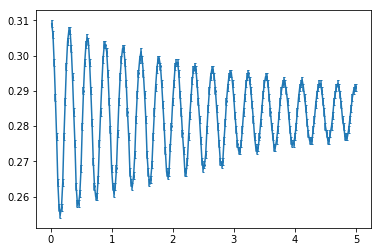

In [11]:
plt.errorbar(tdata, ydata, xerr = udata, yerr = udata, capsize=1,elineswidth=None)


Next, we need to define the model for our data. The curve_fit routine, that we will use for fitting, requires a very particular format for the model function (one in which the variable is its first argument, followed by the model parameters):

In [12]:
def f(t, A, B, gamma, omega, alpha):
    return A + B*np.exp(- gamma * t)*np.cos(omega*t - alpha)

Now let us define some initial “guesstimates” for the model parameters. We will pass these to the fit routine curve_fit in a list p0 and create another list to store the names of the parameters:

In [13]:
#initializing parameters 
A0 =0.02
B0= 0.32
gamma0 = 0.32
omega0 = 17
alpha0 = np.pi/12


In [14]:
# list of initial guesses
p0 = [A0, B0,gamma0, omega0, alpha0]         

In [15]:
name = ['A', 'B', 'gamma', 'omega', 'alpha']

In [16]:
tmodel = np.linspace(0.0, 5.0, 1000)

In [17]:
ystart = f(tmodel, *p0)

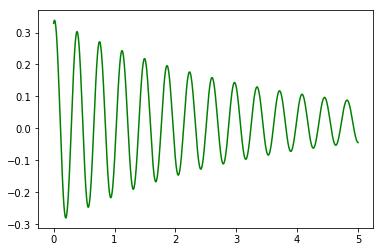

In [18]:
plt.plot(tmodel, ystart, '-g')

In [19]:
#popt returns the optimal best fit values for the parameters
#pcov estimates the covariance matrix
# why are all the elements of the covarience matrix 0
popt, pcov = curve_fit(f, tdata, ydata, p0, sigma=udata, absolute_sigma=True)

In [20]:
popt

array([  0.28337911,   0.02814892,   0.2812143 ,  21.46227647,   0.32938407])

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(pcov)
df

,0,1,2,3,4
0,4.008723e-09,-5.998249e-12,7.850999e-10,-1.246987e-08,-2.450075e-08
1,-5.998249e-12,5.902533e-08,8.491729e-07,-2.598209e-08,-6.878315e-08
2,7.850999e-10,8.491729e-07,2.057984e-05,-3.105607e-07,-9.224055e-07
3,-1.246987e-08,-2.598209e-08,-3.105607e-07,2.106590e-05,3.103464e-05
4,-2.450075e-08,-6.878315e-08,-9.224055e-07,3.103464e-05,7.624679e-05


In [23]:
dymin = (ydata - f(tdata, *popt))/udata

In [24]:
min_chisq = sum(dymin*dymin)

In [25]:
#number of degrees of freedom
dof = len(tdata) -  len(popt)

In [26]:
print('Chi square:', min_chisq)
print('Number of degrees of freedom: ', dof)
print('Chi square per degree of freedom:', min_chisq/dof)

Chi square: 252.731846968
Number of degrees of freedom:  245
Chi square per degree of freedom: 1.03155855905



The “goodness” of the fit is defined via the $\chi^{2}$ value. In fact, the quantity $\chi^{2}$/dof, where dof is the number of degrees of freedom (i.e. the number of data points minus the number of fitted parameters), is the most convenient measure of the quality of the fit. Let us calculate and display the chi square per degree of freedom value corresponding to the best-fit parameters.

In [27]:
#uncertainties of the parameters
perr = np.sqrt(np.diag(pcov))
perr

array([  6.33144758e-05,   2.42951284e-04,   4.53650110e-03,
         4.58976086e-03,   8.73194105e-03])

In [28]:
print('Fitted parameters with 68% C.I.:')

Fitted parameters with 68% C.I.:


In [29]:
for i, pmin in enumerate(popt):
    print('%2i %-10s %12f ± %10f'%(i,
    name[i], pmin,np.sqrt(pcov[i,i])*np.sqrt(min_chisq/dof)))
print()

 0 A              0.283379 ±   0.000064
 1 B              0.028149 ±   0.000247
 2 gamma          0.281214 ±   0.004608
 3 omega         21.462276 ±   0.004662
 4 alpha          0.329384 ±   0.008869



In [30]:
print('Correlation matrix')

print('              ')

Correlation matrix
              


In [31]:
for i in range(len(popt)): print('%-10s'%(name[i])),
print()

for i in range(len(popt)):
    print('%10s'%name[i]),
    for j in range(i+1):
        print('%10f'%(pcov[i,j]/np.sqrt(pcov[i,j]*pcov[j,j]),))
    print()

A         
B         
gamma     
omega     
alpha     

         A
  1.000000

         B
       nan
  1.000000

     gamma
  0.442547
  3.792965
  1.000000

     omega
       nan
       nan
       nan
  1.000000

     alpha
       nan
       nan
       nan
  1.213761
  1.000000



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


Text(0,0.5,'Position y(m)')

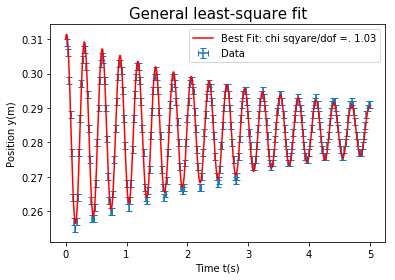

In [32]:
yfit = f(tmodel, *popt)
plt.errorbar(tdata, ydata, xerr = udata, yerr = udata,fmt=None ,capsize=3,elineswidth=None)
plt.plot(tmodel, yfit, '-r')
plt.title('General least-square fit', size=15)
plt.legend(['Best Fit: chi sqyare/dof =. 1.03','Data'])
plt.xlabel('Time t(s)')
plt.ylabel('Position y(m)')


# Fitting to Models Linear Parameters

__Uweighted Linear Least-Squares__

In [33]:
f1 = open('LinearNoErrors.txt', 'r')

In [34]:
header = f1.readline()

In [35]:
x = np.zeros(12)
y = np.zeros(12)

In [36]:
i = 0

In [37]:
for line in f1:
    line = line.strip()
    columns = line.split()
    x[i] = float(columns[0])
    y[i] = float(columns[1])
    i= i+1


In [38]:
def linear(t, c, m):
    return m*x + c

In [39]:
popt1, pcov1 = curve_fit(linear, x, y, sigma=None, absolute_sigma=True)

In [40]:
popt1

array([ 1.0709091 ,  0.59024475])

In [41]:
pcov1

array([[ 0.37878787, -0.04545455],
       [-0.04545455,  0.00699301]])

The two constants match the ones obtained from the computational activity 1.

__Weighted Linear Least-Squares__

In [56]:
f2 = open('5k resistor 503.3hz.txt')

In [57]:
header = f2.readline()

In [58]:
time = np.zeros(250)
v_cap= np.zeros(250)
dy = np.zeros(250)

In [59]:
i = 0

In [60]:
for line in f2:
    line = line.strip()
    columns = line.split()
    time[i] = float(columns[0])
    v_cap[i] = float(columns[1])
    dy[i] = 0.01
    i = i+1

In [61]:
time = time[0:100]
v_cap = v_cap[0:100]
dy = dy[0:100]

In [62]:
popt2, pcov2 = curve_fit(linear, time, v_cap, bounds=(0, 0.001))

ValueError: operands could not be broadcast together with shapes (12,) (100,) 

In [54]:
popt2

NameError: name 'popt2' is not defined

In [55]:
RC = 1/popt2[1]
RC

NameError: name 'popt2' is not defined

In [ ]:
pcov2

__Produce the contour plots for both the wighted and unweighted linear least-squares fits of the previous section and comment on the results.__

In [ ]:
Npts = 10000
mscan = np.zeros(Npts)
cscan = np.zeros(Npts) 
chi_dof = np.zeros(Npts)

In [ ]:
i = 0

In [ ]:
for mpar in np.linspace(0.5, 0.7, 100, True):
    for cpar in np.linspace(0.5, 1.7, 100, True):
        mscan[i] = mpar
        cscan[i] = cpar
        dymin = (ydata - f(tdata, mpar, cpar, gamma0, omega0, alpha0))/udata
        chi_dof[i] = sum(dymin*dymin)/dof
        i = i+1

In [ ]:
len(chi_dof)

In [ ]:
plt.figure()

In [ ]:
ncols = 10

In [ ]:
CS = plt.tricontour(mscan, cscan, chi_dof, ncols)
plt.title('Visualising the uncertainties and correlations using contour plots',
          size=15)
plt.clabel(CS)
plt.colorbar()
plt.show()